# 梯度上升法求解PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:, 0] + np.random.normal(0., 10., size = 100)

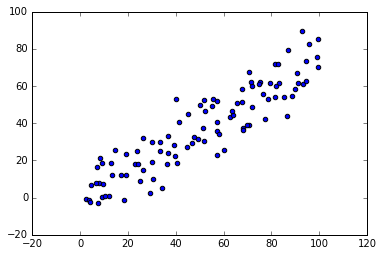

In [3]:
plt.scatter(X[:,0], X[:,1])

**demean**

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

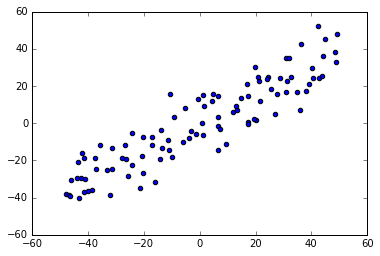

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [7]:
np.mean(X_demean[:,0])

-1.8474111129762605e-15

### 梯度上升法

In [8]:
def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)

In [9]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [10]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty((len(w)))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))  / (2 * epsilon)
    return res

In [11]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(initial_w)   #注意：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X))) < epsilon:
            break
        cur_iter += 1
    return w

In [30]:
#初始w不能是0

initial_w = np.random.random(X.shape[1])
initial_w

array([0.72981316, 0.67443281])

In [35]:
eta = 0.01

In [36]:
# 注意： 不能使用StandardScaler，因为PCA的目的就是找到方差最大的情况

In [37]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.73442259, 0.67869246])

In [38]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

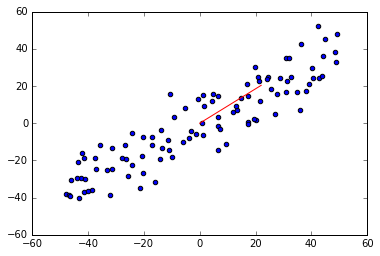

In [39]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')

## 求前n个主成分

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:, 0] + np.random.normal(0., 10., size = 100)

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)

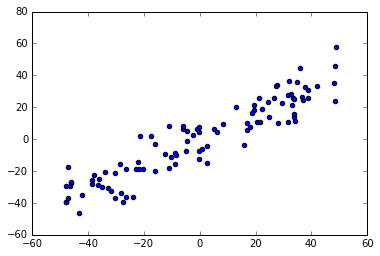

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
def direction(w):
    return w / np.linalg.norm(w)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    cur_iter = 0
    w = direction(initial_w)

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(initial_w)   #注意：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X))) < epsilon:
            break
        cur_iter += 1
    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01

w = first_component(X, initial_w, eta)

In [8]:
w

array([0.77112021, 0.63668958])

In [32]:
#X2 = np.empty(X.shape)
#for i in range(len(X)):
#    X2[i] = X[i] - X[i].dot(w) * w
    
X2 = X - X.dot(w).reshape(-1,1) * w

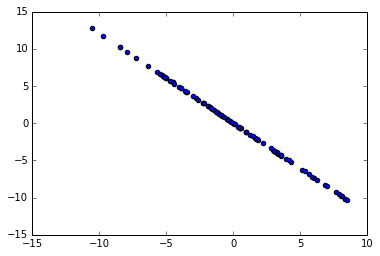

In [33]:
plt.scatter(X2[:, 0], X2[:,1])

In [34]:
initial_w2 = np.random.random(X.shape[1])
w2 = first_component(X2, initial_w2, eta=0.01)
w2

array([0.70774183, 0.70647116])

In [35]:
w.dot(w2)

0.9955568560749559

In [36]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [37]:
first_n_components(2, X)

[array([0.71901854, 0.6949909 ]), array([0.83531911, 0.5497654 ])]

# 求第二个主成分有问题

## 高维数据向低维数据映射

In [38]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size = 100)

In [39]:
from playML.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [40]:
pca.components_

array([[0.11335962, 0.99355402],
       [0.9857778 , 0.16805397]])

**youcuo**

## sklearn中的PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.components_

array([[0.78036491, 0.6253244 ]])

In [44]:
X_reduction = pca.transform(X)

In [45]:
X_reduction.shape

(100, 1)

In [46]:
X_restore = pca.inverse_transform(X_reduction)

In [47]:
X_restore.shape

(100, 2)

In [48]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [50]:
X_train.shape

(1347, 64)

In [51]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 14.6 ms


In [52]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [54]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 1.5 ms


In [55]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

In [56]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [59]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

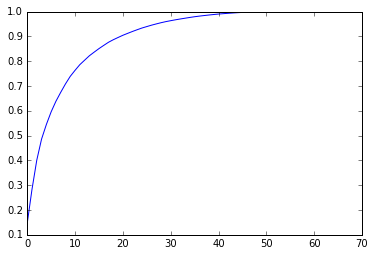

In [60]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [62]:
np.sum(pca.explained_variance_ratio_[:X_train.shape[1]+1])

0.9999999999999999

**PCA中已经封装好了根据保留的方差得多少来选择n个主成分**

In [63]:
pca = PCA(0.95)#解释95%的方差
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.n_components_

28

In [65]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [66]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 1.99 ms


In [67]:
knn_clf.score(X_test_reduction, y_test)

0.98

**用微小的性能降低换取很短的时间**

ValueError: to_rgba: Invalid rgba arg "0.15396272439718917"
to_rgb: Invalid rgb arg "0.15396272439718917"
cannot convert argument to rgb sequence

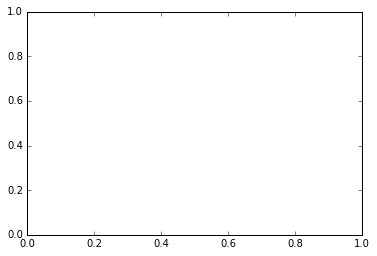

In [78]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

#random_color = random.sample(color)
colors = np.random.rand(1000)

for i in range(10):
    plt.scatter(X_reduction[y == i, 0],X_reduction[y == i, 1], color=alpha=0.8)
plt.show()

## 试手mnist数据集

In [89]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST Original',data_home='C:\\Users\\yyy\\Documents\\playML\\datasets\\mldata')

In [90]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [91]:
X, y = mnist['data'], mnist['target']

In [92]:
X.shape

(70000, 784)

In [93]:
X_train = np.array(X[:60000], dtype=float)#mnist数据集已经分好了训练集和测试集，原始数据集中存储的是整数，在这里转化为浮点数
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

### 使用kNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

Wall time: 21.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
%time knn_clf.score(X_test, y_test)

Wall time: 12min 13s


0.9688

### PCA进行降维

In [97]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [98]:
X_test_reduction = pca.transform(X_test)

clf = KNeighborsClassifier()
clf.fit(X_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
%time clf.score(X_test_reduction, y_test)

Wall time: 1min 6s


0.9728

**降维了之后反而得分变高，耗时变少，说明了PCA的另一个特性，降噪**

## PCA降噪

### 手写识别的例子

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np

noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [3]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [4]:
example_digits.shape

(100, 64)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_digits(data):
    fig,axes=plt.subplots(10,10,figsize=(10,10),
                          subplot_kw={'xticks':[],'yticks':[]},
                          gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
    plt.show()

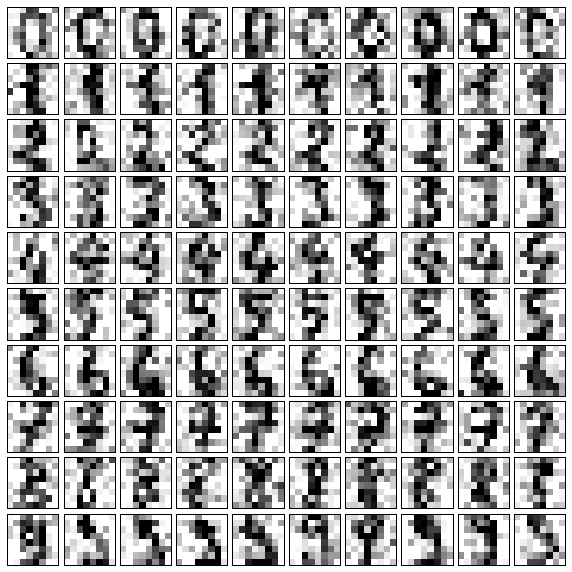

In [8]:
plot_digits(example_digits)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.n_components_

12

In [12]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

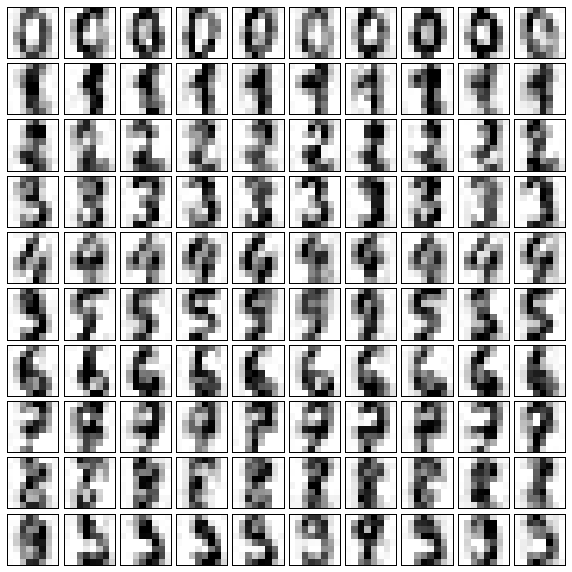

In [13]:
plot_digits(filtered_digits)

## 人脸识别与特征脸

### 特征脸

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import fetch_lfw_people

In [17]:
faces = fetch_lfw_people()

C:\Program Files\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Program Files\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [18]:
faces.keys()

dict_keys(['target_names', 'DESCR', 'data', 'target', 'images'])

In [19]:
faces.data.shape

(13233, 2914)

In [21]:
faces.images.shape

(13233, 62, 47)

In [22]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [23]:
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

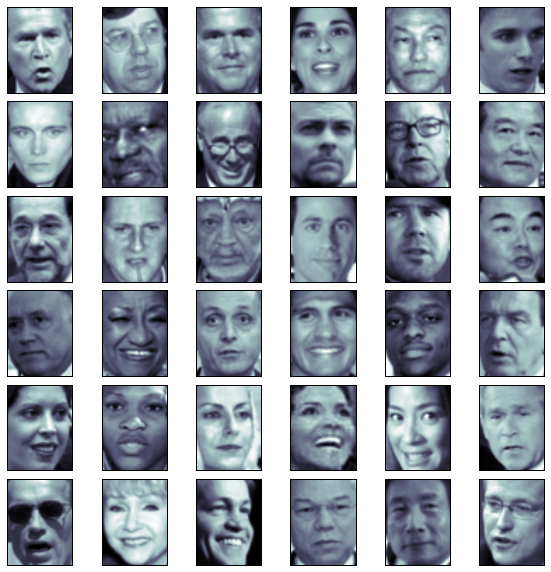

In [24]:
def plot_faces(faces):
    
    fig,axes=plt.subplots(6,6,figsize=(10,10),
                          subplot_kw={'xticks':[],'yticks':[]},
                          gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i , ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

plot_faces(example_faces)

In [25]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [26]:
len(faces.target_names)

5749

In [27]:
%%time

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 26.9 s


In [28]:
pca.components_.shape

(2914, 2914)

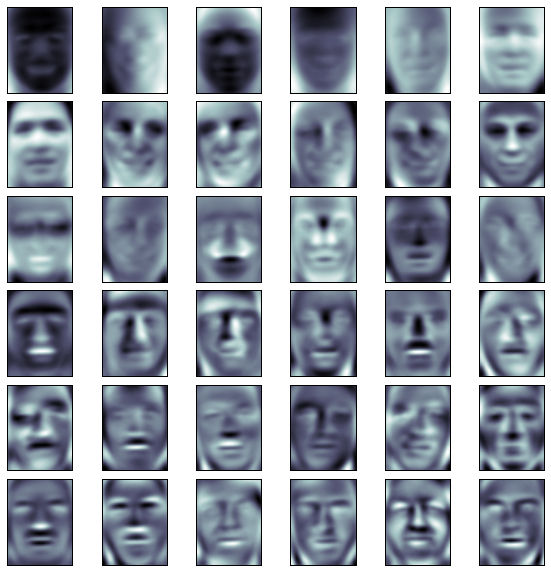

In [29]:
plot_faces(pca.components_[:36,:])

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)#只选取有60张以上图片的人的数据